In [33]:
#Python_Libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm




In [5]:
#reading the dataset
df=pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [3]:
df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
df.shape

(9134, 24)

**Data Analysis and Visulization**

In [8]:
#If you look at the data, you will notice a column named Response. It contains information on whether a customer responded to marketing calls. We will use this field as a measure of customer engagement.
#for the model creation ,its better to encode the values.
#Creating a new field "Engaged" with encoded values
df['Engaged']=df['Response'].apply(lambda x:0 if x=='No' else 1)

In [9]:
df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


**Engagement Rate**
The first thing that we are going to look at is the aggregate engagement rate.
This engagement rate is simply the percentage of customers that responded to
the marketing calls


In [11]:
#To calculate Engagement rate , we we are grouping by the newly created field,
#Engaged, using the groupby function of a pandas DataFrame. Then, we are counting
#the number of records (or customers) in each Engaged group with the count
#function. By dividing by the total number of customers in the DataFrame and
#multiplying by 100.0, we get the engagement rate.
engagement_rate_df=pd.DataFrame(
    df.groupby('Engaged').count()['Response']/df.shape[0]*100
)

In [12]:
engagement_rate_df

,Response
Engaged,
0,85.679877
1,14.320123


In [15]:
#transporse the dataframe ,to make it clear
#about 14% of the customers have responded to marketiing calls and remaining 86% have not responded
engagement_rate_df.T

Engaged,0,1
Response,85.679877,14.320123


**Sales Channels**
To find any noticable changes between sales channel and engagement

In [18]:
engagement_by_sales_channel_df=pd.pivot_table(
    df,values='Response',index='Sales Channel',columns='Engaged',aggfunc=len).fillna(0.0)
engagement_by_sales_channel_df.columns=['Not Engaged','Engaged']


In [19]:
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


As you can see from these
charts, more than half of the engaged customers were from agents, whereas
non-engaged customers are more evenly distributed across all four different
channels. As

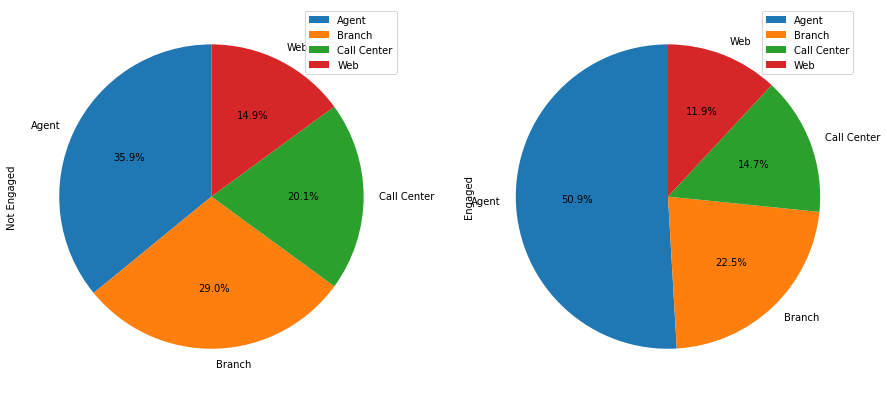

In [21]:
#show the
#distributions of engaged and non-engaged customers across different sales
#channels Compared
engagement_by_sales_channel_df.plot(
    kind='pie',
    figsize=(15,7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)
plt.show()

**Total Claim Amounts**
the differences in the distributions of Total Claim Amount between
the engaged and non-engaged groups

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


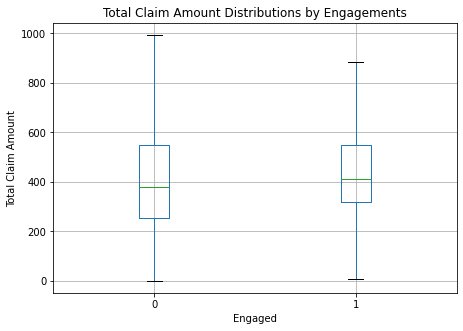

In [23]:
#Box plots are a
#great way to visualize the distributions of continuous variables
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
by='Engaged',
showfliers=False,
figsize=(7,5)
)
ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Engagements')
plt.suptitle("")
plt.show()

# **Logistic Regression Analysis **

In [24]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [25]:
#We are going to store this list of the names of continuous variables in a
#separate variable, named continuous_vars.
continuous_vars = [
'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
'Months Since Last Claim', 'Months Since Policy Inception',
'Number of Open Complaints', 'Number of Policies',
'Total Claim Amount'
]

We are supplying the Engaged column as the output variable,
which the model will learn to estimate, and the continuous_vars that contain all
of the continuous variables as the input variables

In [34]:
logit = sm.Logit(
df['Engaged'],
df[continuous_vars]
)

In [36]:
#we are using the fit function of the logistic
#regression object, logit, to train a logistic regression model.
logit_fit=logit.fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


Let's take a closer look at this model output. coef represents the coefficients
for each of the input variables, and z represents the z-score, which is the
number of standard deviations from the mean. The P>|z| column represents the
p-value, which means how likely it is to observe the relationship between the
feature and the output variable by chance. So, the lower the value of P>|z| is,
the more likely it is that the relationship between the given feature and the
output variable is strong and is not by chance. Typically, 0.05 is a good cut-off
point for the p-value, and any value less than 0.05 signifies a strong
relationship between the given feature and the output variable.

**Regression Interpretation**
Looking at this model output, we can see that Income, Monthly Premium Auto, Months
Since Last Claim, Months Since Policy Inception, and Number of Policies variables have
significant relationships with the output variable, Engaged. For example, Number
of Policies variable is significant and is negatively correlated with Engaged. This
suggests that the more policies that the customers have, the less likely they are
to respond to marketing calls. As another example, the Months Since Last Claim
variable is significant and is negatively correlated with the output
variable, Engaged. This means that the longer it has been since the last claim,
the less likely that the customer is going to respond to marketing calls.

In [37]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Fri, 02 Jul 2021   Pseudo R-squ.:                -0.02546
Time:                        16:57:51   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

**Taking Gender into Consideration**

In [38]:
df['Gender_df']=df['Gender'].apply(lambda x:0 if x=='F' else 1)

In [39]:
continuous_vars1 = [
'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
'Months Since Last Claim', 'Months Since Policy Inception',
'Number of Open Complaints', 'Number of Policies','Gender_df',
'Total Claim Amount'
]

In [40]:
logit1 = sm.Logit(
df['Engaged'],
df[continuous_vars1]
)

In [41]:
logit_fit1=logit1.fit()

Optimization terminated successfully.
         Current function value: 0.420814
         Iterations 6


In [42]:
logit_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9125
Method:                           MLE   Df Model:                            8
Date:                Fri, 02 Jul 2021   Pseudo R-squ.:                -0.02454
Time:                        17:07:18   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.887e-06   5.03e-06     -1.368      0.171   -1.68e-05    2.98e-06
Income                        -2.609e-06   1.04e-06     -2.519      0.012   -4.64e-06   -5.79e-07
Monthly Premium Auto             -0.0082      0.001     -6.765      0.000      -0.011      -0.006
Months Since Last Claim          -0.0194      0.003     -6.934      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0057      0.001     -5.892      0.000      -0.008      -0.004
Number of Open Complaints        -0.0817      0.034     -2.389      0.017      -0.149      -0.015
Number of Policies               -0.0784      0.013     -6.143      0.000      -0.103      -0.053
Gender_df                        -0.1510      0.058     -2.616      0.009      -0.264      -0.038
Total Claim Amount                0.0002      0.000      0.987      0.324      -0.000       0.000
=================================================================================================
"""

Lastly, male customers are less likely to engage with marketing calls than
female customers, which we can see from looking at the coefficient of
GenderFactorized. From looking at this regression analysis output, we can easily
see the relationships between the input and output variables, and we can
understand which attributes of customers are positively or negatively related
to customer engagement with marketing calls.
*******************************************************************************************